In [ ]:
from actor_critic import Agent
import gymnasium as gym
import matplotlib.pyplot as plt
import numpy as np

In [14]:
agent = Agent(input_dim=4, n_actions=2, lr=0.0003)
env = gym.make('CartPole-v1')

score_history = []
num_episodes = 1000

for i in range(num_episodes):
    score = 0
    done = False
    observation, _ = env.reset()
    print(observation)
    while not done:
        action = agent.choose_action(observation)
        new_observation, reward, done, info, _ = env.step(action)
        score += reward
        agent.learn(observation, new_observation, reward, done)
        observation = new_observation
    
    score_history.append(score)
    print('episode: ', i,'score: %.2f' % score)



episode:  46 score: 62.00
[ 0.04613147 -0.02958314  0.01046744 -0.02958841]
episode:  47 score: 38.00
[ 0.01703141  0.01931468 -0.02131141 -0.04155908]
episode:  48 score: 80.00
[ 0.01965493  0.01108349 -0.02486146 -0.00224107]
episode:  49 score: 84.00
[-0.02097323 -0.03907038 -0.00181502 -0.01023534]
episode:  50 score: 55.00
[-0.00519344 -0.01549917 -0.00521542  0.02620493]
episode:  51 score: 61.00
[0.03166364 0.01304117 0.03863547 0.03643023]
episode:  52 score: 40.00
[ 0.00085188 -0.04965664  0.03471467  0.03792645]
episode:  53 score: 39.00
[ 0.03016321 -0.02209797  0.00937782 -0.00899286]
episode:  54 score: 43.00
[-0.0076689  -0.01757346 -0.02316949  0.01518359]
episode:  55 score: 60.00
[ 0.01050972 -0.02428014 -0.00143245  0.04498468]
episode:  56 score: 70.00
[-0.03195599  0.02968888 -0.00283182 -0.01089898]
episode:  57 score: 50.00
[-0.01030564 -0.04836907  0.01700024 -0.00515364]
episode:  58 score: 38.00
[-0.03198485 -0.00302572  0.00214413  0.00396989]
episode:  59 sco

Text(0.5, 1.0, 'Running average of previous 100 episodes')

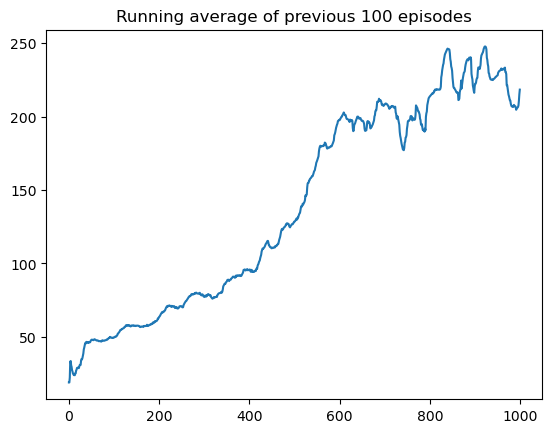

In [15]:
running_avg = np.zeros(len(score_history))
for i in range(len(running_avg)):
    running_avg[i] = np.mean(score_history[max(0, i-100):(i+1)])
plt.plot(range(len(score_history)), running_avg)
plt.title('Running average of previous 100 episodes')